# Dry Bean Classification dengan Quantum Neural Network (QNN)

In [1]:
# Install library
# pip install ucimlrepo qiskit==0.46.1 qiskit-aer pylatexenc qiskit-machine-learning imbalanced-learn

## Load Dataset & Exploratory Data Analysis (EDA)

Dataset link: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# Fetch dataset
dataset = fetch_ucirepo(id=602)

# Data
X = dataset.data.features
y = dataset.data.targets

In [4]:
# Metadata dari dataset
dataset.metadata

{'uci_id': 602,
 'name': 'Dry Bean',
 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv',
 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 13611,
 'num_features': 16,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['Class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2020,
 'last_updated': 'Thu Mar 28 2024',
 'dataset_doi': '10.24432/C50S4B',
 'creators': [],
 'intro_paper': {'ID': 244,
  'type': 'NATIVE',
  'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques',
  'authors': 'M. Koklu, Ilke

In [5]:
# Informasi variabel/fitur
dataset.variables

,name,role,type,demographic,description,units,missing_values
0,Area,Feature,Integer,None,The area of a bean zone and the number of pixe...,pixels,no
1,Perimeter,Feature,Continuous,None,Bean circumference is defined as the length of...,None,no
2,MajorAxisLength,Feature,Continuous,None,The distance between the ends of the longest l...,None,no
3,MinorAxisLength,Feature,Continuous,None,The longest line that can be drawn from the be...,None,no
4,AspectRatio,Feature,Continuous,None,Defines the relationship between MajorAxisLeng...,None,no
5,Eccentricity,Feature,Continuous,None,Eccentricity of the ellipse having the same mo...,None,no
6,ConvexArea,Feature,Integer,None,Number of pixels in the smallest convex polygo...,None,no
7,EquivDiameter,Feature,Continuous,None,Equivalent diameter: The diameter of a circle ...,None,no
8,Extent,Feature,Continuous,None,The ratio of the pixels in the bounding box to...,None,no
9,Solidity,Feature,Continuous,None,Also known as convexity. The ratio of the pixe...,None,no


In [6]:
# Preview dataset
df = pd.concat([X, y], axis=1)
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [7]:
# Melihat jumlah kolom, tipe data, dan banyak data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
# 
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Dari tinjauan data, dapat dilihat bahwa
- Dataset ini terdiri dari **13.611 baris** dan **17 kolom**.
- Tidak terdapat nilai Null.
- Semua data bertipe numerik (int64, float64) bisa dijadikan fitur.
- Data Class bertipe kategorik akan dijadikan target.
- Rentang minimum dan maksimum dari deskripsi data menunjukkan perlunya standarisasi.

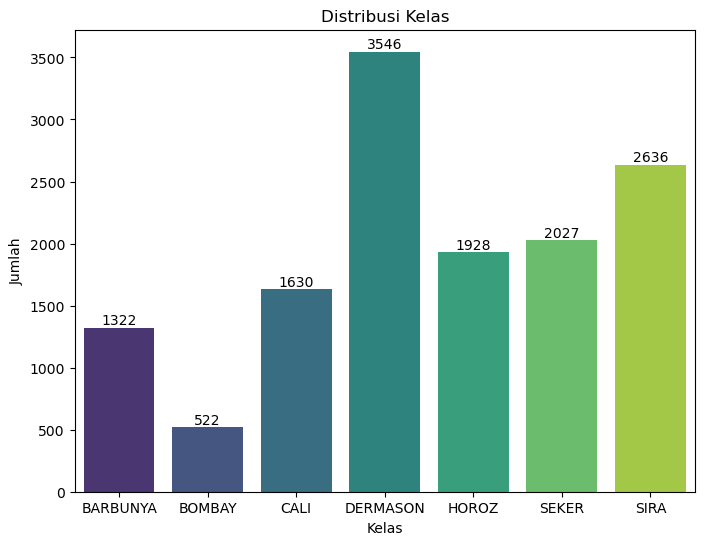

In [9]:
# Mencari distribusi kelas

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class ClassDistributionPlotter:
    def __init__(self, df, class_column):
        self.df = df
        self.class_column = class_column

    def plot_distribution(self):
        # Menghitung distribusi kelas
        class_list = self.df[self.class_column].value_counts().sort_index()

        # Plot distribusi kelas
        plt.figure(figsize=(8, 6))
        sns.countplot(x=self.class_column, data=self.df, palette='viridis', 
                      order=class_list.index, hue=self.class_column, hue_order=class_list.index)
        plt.title('Distribusi Kelas')
        plt.xlabel('Kelas')
        plt.ylabel('Jumlah')

        # Menambahkan value di atas masing-masing kelas
        for idx, value in enumerate(class_list):
            plt.text(idx, value, str(value), ha='center', va='bottom')

        plt.show()

plotter = ClassDistributionPlotter(df, 'Class')
plotter.plot_distribution()

- Dataset memiliki 7 jenis kacang dalam kolom "Class".
- Jenis kacang "BOMBAY" muncul paling jarang (522).
- Jenis kacang "DERMASON" muncul paling sering (3546).

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

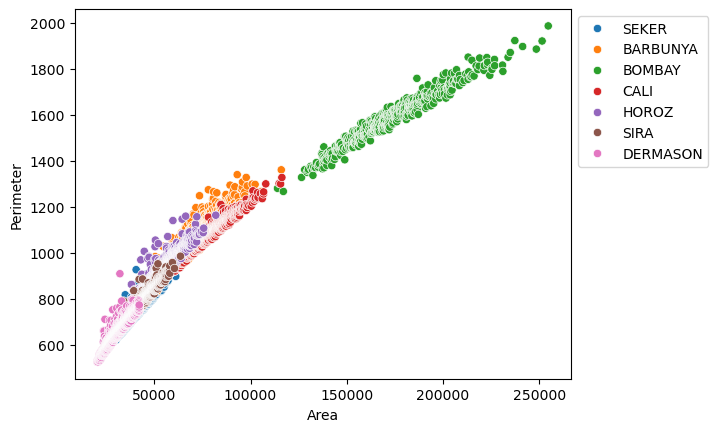

In [11]:
# Hubungan antar variabel

sns.scatterplot(x='Area', y='Perimeter', hue='Class', data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

Dari plot di atas, dapat disimpulkan bahwa:
- Class "Bombay" memiliki luas dan keliling yang lebih besar
- Class "Dermason" memiliki luas dan keliling yang lebih kecil

In [12]:
# Lihat korelasi antar fitur
correlation_matrix = X.corr()
correlation_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRatio,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


Text(0.5, 1.0, 'Correlation Coefficient')

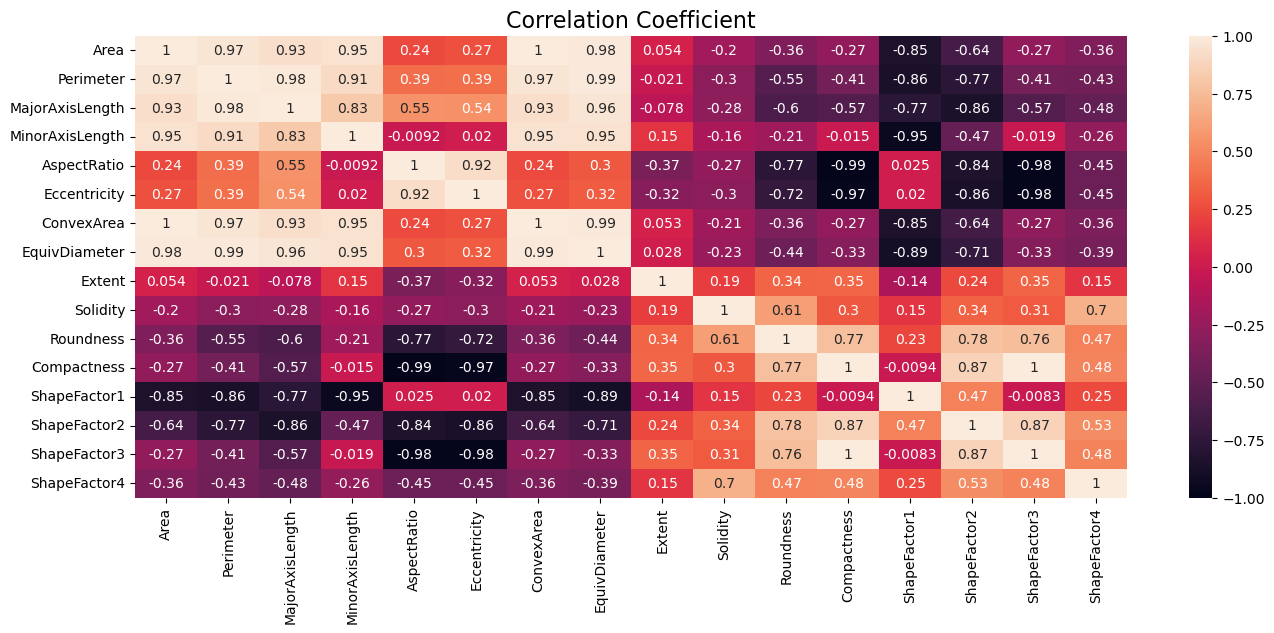

In [13]:
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Coefficient', size=16)

Beberapa fitur yang memiliki korelasi positif yang tinggi:
- Area dan Perimeter (0.97)
- Area dan MajorAxisLength (0.93)
- Area dan MinorAxisLength (0.95)
- Area dan ConvexArea (1)
- Area dan EquivDiameter (0.98)
- Perimeter dan MajorAxisLength (0.98)
- Perimeter dan MinorAxisLength (0.91)
- Perimeter dan ConvexArea (0.97)
- Perimeter dan EquivDiameter (0.99)
- MajorAxisLength dan ConvexArea (0.93)
- MajorAxisLength dan EquivDiameter (0.96)
- MinorAxisLength dan ConvexArea (0.95)
- MinorAxisLength dan EquivDiameter (0.95)
- ConvexArea dan EquivDiameter (0.99)

Beberapa fitur yang memiliki korelasi negatif yang tinggi:
- MinorAxisLength dan ShapeFactor1 (-0.95)
- AspectRatio dan Compactness (-0.99)
- Eccentricity dan Compactness (-0.97)
- AspectRatio dan ShapeFactor3 (-0.98)
- Eccentricity dan ShapeFactor3 (-0.98)
- ShapeFactor1 dan Area (-0.85)
- ShapeFactor1 dan Perimeter (-0.86)

Dari data korelasi tersebut, dapat dilihat bahwa:
1. Redundansi fitur: banyak fitur yang memiliki korelasi yang sangat tinggi satu sama lain, seperti `Area`, `Perimeter`, `MajorAxisLength`, `MinorAxisLength`, `ConvexArea`, `EquivDiameter`. Misal, `Area` dan `ConvexArea` memiliki korelasi sempurna (1), yang berarti kedua fitur memberi informasi yang identik.
2. Hubungan negatif kuat: beberapa fitur seperti `ShapeFactor1` dengan beberapa fitur `Area`, `Perimeter`, `MinorAxisLength` memiliki korelasi negatif yang tinggi. Ini menunjukkan bahwa ketika satu fitur meningkat, fitur lainnya menurun secara signifikan.
3. `AspectRatio` memiliki korelasi kuat dengan `Eccentricity`, tetapi tidak berkorelasi baik dengan `Area`, `Perimeter`, `MajorAxisLength`, `MinorAxisLength`. Ini menunjukkan bahwa `AspectRatio` memberi informasi unik yang tidak ditangkap fitur lain dan berguna untuk model.

Dari 16 fitur tersebut, coba ambil beberapa fitur saja untuk model
1. Area
2. EquivDiameter
3. MinorAxisLength
4. AspectRatio
5. Compactness
6. ShapeFactor1

## Preprocessing

In [14]:
# Hanya gunakan 2 kelas: Bombay dan Dermason
# Hanya gunakan 6 fitur: Area, EquivDiameter, MinorAxisLength, AspectRatio, Compactness, ShapeFactor1

import pandas as pd

# Memilih hanya kelas tertentu
selected_classes = ['BOMBAY', 'DERMASON']
df_filtered = df[df['Class'].isin(selected_classes)]

# Memilih hanya fitur tertentu
# selected_features = ['Area', 'EquivDiameter', 'MinorAxisLength', 'AspectRatio', 'Compactness', 'ShapeFactor1']
selected_features = ['Area', 'MinorAxisLength', 'Compactness', 'ShapeFactor1']
df_selected = df_filtered[selected_features + ['Class']]

df_selected

,Area,MinorAxisLength,Compactness,ShapeFactor1,Class
3349,114004,323.747996,0.844094,0.003959,BOMBAY
3350,117034,351.215109,0.906315,0.003639,BOMBAY
3351,126503,339.381887,0.843541,0.003761,BOMBAY
3352,128118,325.678447,0.801324,0.003934,BOMBAY
3353,129409,341.172659,0.838041,0.003743,BOMBAY
...,...,...,...,...,...
13606,42097,185.944705,0.801865,0.006858,DERMASON
13607,42101,190.713136,0.822252,0.006688,DERMASON
13608,42139,191.187979,0.822730,0.006681,DERMASON
13609,42147,190.275731,0.817457,0.006724,DERMASON


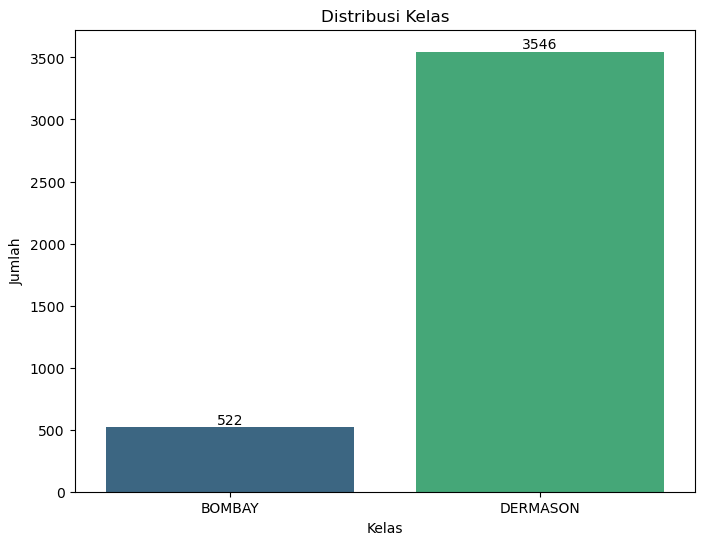

In [15]:
# Melihat distribusi kelas pada data setelah difilter

plotter = ClassDistributionPlotter(df_selected, 'Class')
plotter.plot_distribution()

In [16]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Memisahkan fitur dan label
y = df_selected['Class']
X = df_selected.drop('Class', axis=1)

# Menampilkan distribusi awal kelas
print(f"Disitribusi awal kelas: {Counter(y)}")

# Lakukan Random Undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_res, y_res = rus.fit_resample(X, y)

# Menampilkan distribusi kelas setelah undersampling
print(f"Distribusi kelas setelah undersampling: {Counter(y_res)}")

# Gabungkan kembali fitur dan label menjadi DataFrame
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['Class'] = y_res

df_resampled.head()

Disitribusi awal kelas: Counter({'DERMASON': 3546, 'BOMBAY': 522})
Distribusi kelas setelah undersampling: Counter({'BOMBAY': 522, 'DERMASON': 522})


,Area,MinorAxisLength,Compactness,ShapeFactor1,Class
3349,114004,323.747996,0.844094,0.003959,BOMBAY
3350,117034,351.215109,0.906315,0.003639,BOMBAY
3351,126503,339.381887,0.843541,0.003761,BOMBAY
3352,128118,325.678447,0.801324,0.003934,BOMBAY
3353,129409,341.172659,0.838041,0.003743,BOMBAY


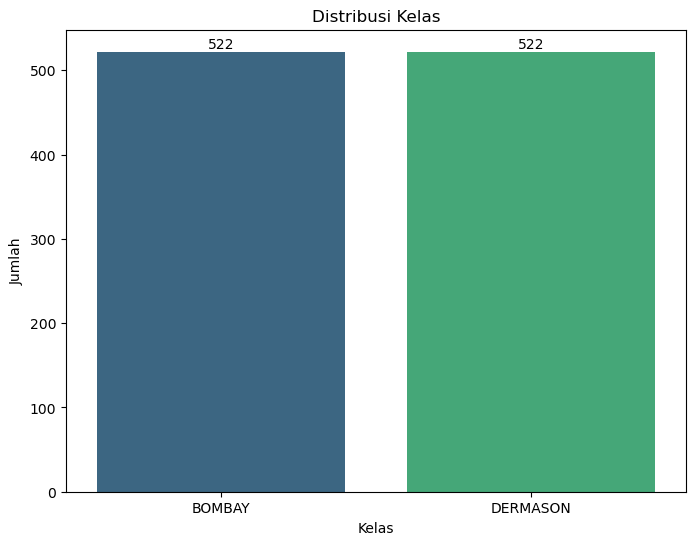

In [17]:
# Melihat distribusi kelas pada data setelah dilakukan random undersampling

plotter = ClassDistributionPlotter(df_resampled, 'Class')
plotter.plot_distribution()

In [18]:
print(df_resampled)

         Area  MinorAxisLength  Compactness  ShapeFactor1     Class
3349   114004       323.747996     0.844094      0.003959    BOMBAY
3350   117034       351.215109     0.906315      0.003639    BOMBAY
3351   126503       339.381887     0.843541      0.003761    BOMBAY
3352   128118       325.678447     0.801324      0.003934    BOMBAY
3353   129409       341.172659     0.838041      0.003743    BOMBAY
...       ...              ...          ...           ...       ...
12970   36926       179.652704     0.826853      0.007102  DERMASON
13376   39545       189.881507     0.843977      0.006723  DERMASON
11610   31040       159.508356     0.799584      0.008010  DERMASON
12896   36481       175.906295     0.814740      0.007251  DERMASON
12235   33478       171.049939     0.826694      0.007460  DERMASON

[1044 rows x 5 columns]


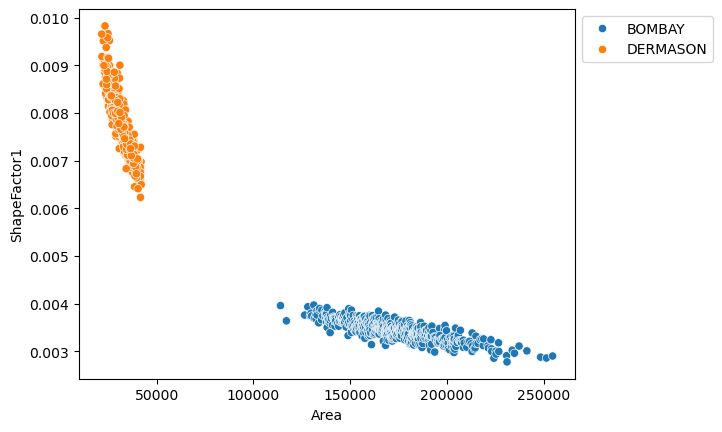

In [19]:
# Cek lagi hubungan antar variabel

sns.scatterplot(x='Area', y='ShapeFactor1', hue='Class', data=df_resampled)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

In [20]:
# Lihat lagi korelasi antar fitur
correlation_matrix = X_res.corr()
correlation_matrix

,Area,MinorAxisLength,Compactness,ShapeFactor1
Area,1.000000,0.990755,-0.446719,-0.971859
MinorAxisLength,0.990755,1.000000,-0.353022,-0.989539
Compactness,-0.446719,-0.353022,1.000000,0.335286
ShapeFactor1,-0.971859,-0.989539,0.335286,1.000000


Text(0.5, 1.0, 'Correlation Coefficient')

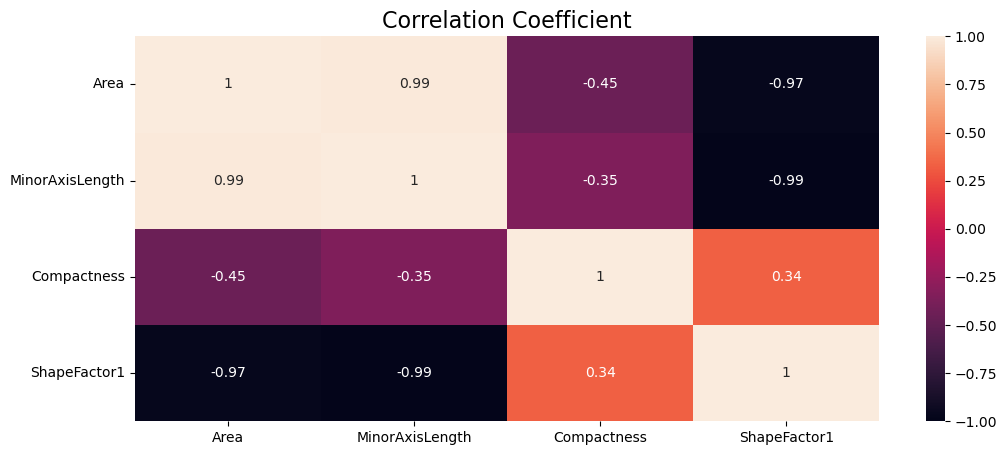

In [21]:
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Coefficient', size=16)

In [51]:
# Cek ulang data
df_preprocessed = pd.concat([X_res, y_res], axis=1)

df_preprocessed.head(10)

,Area,MinorAxisLength,Compactness,ShapeFactor1,Class
3349,114004,323.747996,0.844094,0.003959,BOMBAY
3350,117034,351.215109,0.906315,0.003639,BOMBAY
3351,126503,339.381887,0.843541,0.003761,BOMBAY
3352,128118,325.678447,0.801324,0.003934,BOMBAY
3353,129409,341.172659,0.838041,0.003743,BOMBAY
3354,129807,336.464837,0.824222,0.003800,BOMBAY
3355,130070,343.114783,0.836136,0.003742,BOMBAY
3356,131249,323.790256,0.784406,0.003971,BOMBAY
3357,131488,345.621263,0.842089,0.003695,BOMBAY
3358,132254,339.636342,0.824390,0.003764,BOMBAY


In [52]:
# Label Encoding
# Target masih berupa kategori, ubah menjadi 0 dan 1

from sklearn.preprocessing import LabelEncoder

df_preprocessed = df_preprocessed[df_preprocessed['Class'].isin(['BOMBAY', 'DERMASON'])]

label_encoder = LabelEncoder()

# Transform data
df_preprocessed['Class'] = label_encoder.fit_transform(df_preprocessed['Class'])

# Ubah label 0 menjadi -1
df_preprocessed['Class'] = df_preprocessed['Class'].apply(lambda x: -1 if x == 0 else 1)

print(df_preprocessed)

         Area  MinorAxisLength  Compactness  ShapeFactor1  Class
3349   114004       323.747996     0.844094      0.003959     -1
3350   117034       351.215109     0.906315      0.003639     -1
3351   126503       339.381887     0.843541      0.003761     -1
3352   128118       325.678447     0.801324      0.003934     -1
3353   129409       341.172659     0.838041      0.003743     -1
...       ...              ...          ...           ...    ...
12970   36926       179.652704     0.826853      0.007102      1
13376   39545       189.881507     0.843977      0.006723      1
11610   31040       159.508356     0.799584      0.008010      1
12896   36481       175.906295     0.814740      0.007251      1
12235   33478       171.049939     0.826694      0.007460      1

[1044 rows x 5 columns]


In [53]:
features = df_preprocessed.drop('Class', axis=1)
labels = df_preprocessed['Class']

In [54]:
# Normalisasi
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X = StandardScaler().fit_transform(features)
y = np.ravel(labels)

In [56]:
# Cek shape dari X dan y apakah sudah sesuai
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1044, 4)
y shape: (1044,)


In [57]:
# Split train-test set (80:20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## QNN Model

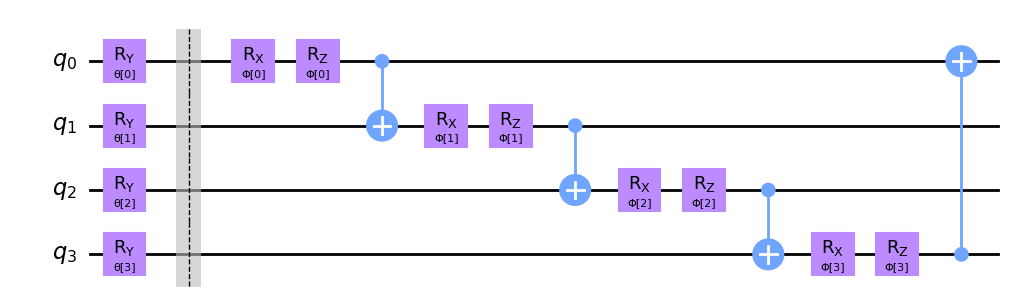

In [65]:
# Arsitektur sirkuit kuantum
from qiskit.circuit import QuantumCircuit, ParameterVector

# Parameter sirkuit
num_qubits = X_train.shape[1]
theta      = ParameterVector('θ', num_qubits)
phi        = ParameterVector('Φ', num_qubits)
circuit    = QuantumCircuit(num_qubits)

# Encoding
for i in range(num_qubits):
  circuit.ry(theta[i], i)

circuit.barrier()

# Ansatz
for i in range(num_qubits - 1):
  circuit.rx(phi[i], i)
  circuit.rz(phi[i], i)
  circuit.cx(i, i + 1)
circuit.rx(phi[num_qubits - 1], num_qubits - 1)
circuit.rz(phi[num_qubits - 1], num_qubits - 1)
circuit.cx(num_qubits - 1, 0)

# Plot sirkuit
circuit.draw(output='mpl', style='clifford')

In [66]:
# Kurva pembelajaran
import time
from IPython.display import clear_output

objective_func_vals = []
def callback_graph(weights, obj_func_eval):
  clear_output(wait=True)
  objective_func_vals.append(obj_func_eval)
  plt.title("Objective function value against iteration")
  plt.xlabel("Iteration")
  plt.ylabel("Objective function value")
  plt.plot(range(len(objective_func_vals)), objective_func_vals)
  plt.show()

In [67]:
# Classifier
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.opflow import PauliSumOp, StateFn
from qiskit.algorithms.optimizers import COBYLA, ADAM, QNSPSA, AQGD
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier

simulator        = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(simulator)
observable       = PauliSumOp.from_list([("XYZX", 1.0)])
optimizer        = COBYLA(maxiter=100)

qnn_expectation  = StateFn(observable, is_measurement=True) @ StateFn(circuit)
estimator_qnn    = EstimatorQNN(
    circuit=circuit,
    observables=observable,
    input_params=theta,
    weight_params=phi
)
qnn = NeuralNetworkClassifier(
    estimator_qnn, optimizer=optimizer, loss='squared_error', callback=callback_graph
)

C:\Users\hafid\AppData\Local\Temp\ipykernel_24564\997760724.py:10: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(simulator)
C:\Users\hafid\AppData\Local\Temp\ipykernel_24564\997760724.py:14: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/opflow_migration.
  qnn_expectation  = StateFn(observable, is_measurement=True) @ StateFn(circuit)
C:\Users\hafid\AppData\Local\Temp\ipykernel_24564\997760724.py:14: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code 

## Training

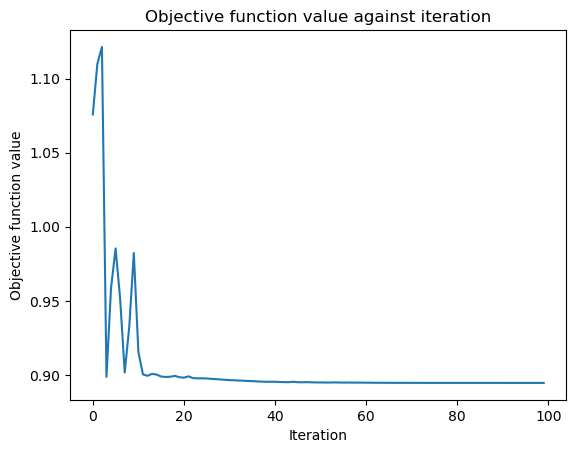

Training time: 230 seconds


In [68]:
start = time.time()
qnn.fit(X_train, y_train)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

## Evaluation

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import classification_report

y_pred_train = qnn.predict(X_train)
y_pred_test  = qnn.predict(X_test)

# Periksa nilai unik dalam prediksi
print("Unique values in y_pred_train:", np.unique(y_pred_train))
print("Unique values in y_pred_test:", np.unique(y_pred_test))

print("TRAINING:")
print(classification_report(y_train, y_pred_train))
print("TESTING:")
print(classification_report(y_test, y_pred_test))

Unique values in y_pred_train: [-1.  1.]
Unique values in y_pred_test: [-1.  1.]
TRAINING:
              precision    recall  f1-score   support

          -1       0.71      0.53      0.61       415
           1       0.63      0.79      0.70       420

    accuracy                           0.66       835
   macro avg       0.67      0.66      0.66       835
weighted avg       0.67      0.66      0.66       835

TESTING:
              precision    recall  f1-score   support

          -1       0.75      0.54      0.63       107
           1       0.63      0.81      0.71       102

    accuracy                           0.67       209
   macro avg       0.69      0.68      0.67       209
weighted avg       0.69      0.67      0.67       209



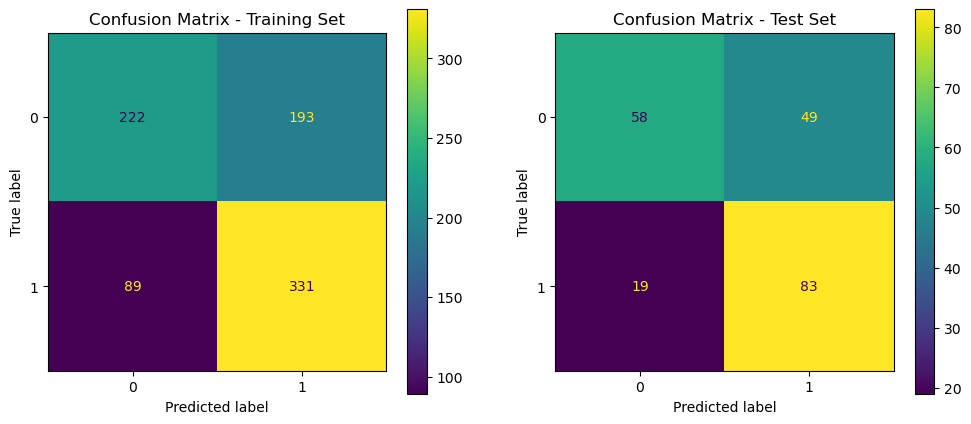

In [70]:
# Confusion matrix
cm_tr   = confusion_matrix(y_train, y_pred_train)
disp_tr = ConfusionMatrixDisplay(confusion_matrix=cm_tr)
cm_ts   = confusion_matrix(y_test, y_pred_test)
disp_ts = ConfusionMatrixDisplay(confusion_matrix=cm_ts)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
disp_tr.plot(ax=ax[0])
ax[0].set_title("Confusion Matrix - Training Set")
disp_ts.plot(ax=ax[1])
ax[1].set_title("Confusion Matrix - Test Set")
plt.show()

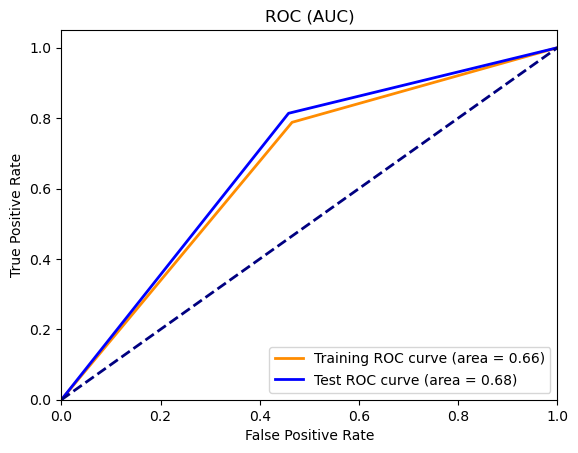

In [71]:
# Kurva ROC (AUC)
fpr_tr, tpr_tr, _ = roc_curve(y_train, y_pred_train)
roc_auc_tr        = auc(fpr_tr, tpr_tr)
fpr_ts, tpr_ts, _ = roc_curve(y_test, y_pred_test)
roc_auc_ts        = auc(fpr_ts, tpr_ts)

plt.figure()
plt.plot(fpr_tr, tpr_tr, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_tr)
plt.plot(fpr_ts, tpr_ts, color='blue', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_ts)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (AUC)')
plt.legend(loc='lower right')
plt.show()